# Regularization

필요한 라이브러리들을 import해줍니다.
이제 아래 Dense, Flatten같은 용어들이 익숙해지셨으리라고 생각합니다 🙂

In [ ]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.models import Sequential

아래 코드는 학습 경과를 나타내는 Learning curve를 그리는 기능을 수행합니다

python에서 플롯을 그리기 쉽게 도와주는 matplotlib을 활용하였습니다.

아래 코드는 단순한 개발영역이므로... 이 코드를 찬찬히 뜯어보실 필요는 없습니다.

나중에 학습이 끝나고 그려진 learning curve를 해석하실 수만 있다면 됩니다.

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories):
  plt.figure(figsize=(9,6))

  for history in histories:
    plt.plot(history.epoch, history.history['accuracy'], label='training')
    plt.plot(history.epoch, history.history['val_accuracy'], label='validation')

  plt.xlabel('Epochs')
  plt.ylabel('ACC')
  plt.legend()

  plt.xlim([0,max(history.epoch)])

MNIST 데이터를 로드해줍니다. 

7만장의 데이터를 학습(training), 검증(validation), 테스트(test) 셋으로 나누어줍니다.

In [ ]:
# data load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 0~255의 픽셀 값을 0~1로 조정
x_train, x_test = x_train / 255.0, x_test / 255.0

# shape 조정
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정답 label을 길이10 벡터화
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# validation set 별도 구분
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

바로 실습미션부터 수행해보겠습니다.

새로운 내용이 아니라, 앞의 두 실습에서 수행했던 모델 아키텍처 구성이므로 익숙하게 하실 수 있을겁니다

# MISSION #1 : 베이스 모델 만들고 학습하기

* 1024짜리 노드를 가진 Dense레이어 5층 쌓기
* 위에서 구성한 레이어 각각 Activation으로 ReLU 이용
* 출력 레이어로는 Dense레이어 구성, softmax 활용하여 10개 숫자 분류

(힌트 : 위 내용으로만 구성하면 학습이 제대로 이뤄지지 않습니다. FNN을 적용할 땐 맨 앞에서 고차원 이미지를 1차원으로 납작하게 누르는 레이어가 들어가야 합니다)

Epoch 1/25
196/196 [==============================] - 6s 14ms/step - loss: 0.5568 - accuracy: 0.8243 - val_loss: 0.1331 - val_accuracy: 0.9621
Epoch 2/25
196/196 [==============================] - 2s 11ms/step - loss: 0.0959 - accuracy: 0.9711 - val_loss: 0.1057 - val_accuracy: 0.9681
Epoch 3/25
196/196 [==============================] - 2s 11ms/step - loss: 0.0609 - accuracy: 0.9821 - val_loss: 0.0994 - val_accuracy: 0.9707
Epoch 4/25
196/196 [==============================] - 2s 11ms/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.1020 - val_accuracy: 0.9722
Epoch 5/25
196/196 [==============================] - 2s 10ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.0910 - val_accuracy: 0.9776
Epoch 6/25
196/196 [==============================] - 2s 11ms/step - loss: 0.0310 - accuracy: 0.9910 - val_loss: 0.1026 - val_accuracy: 0.9759
Epoch 7/25
196/196 [==============================] - 2s 11ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.0935 - val_accuracy: 0.9777

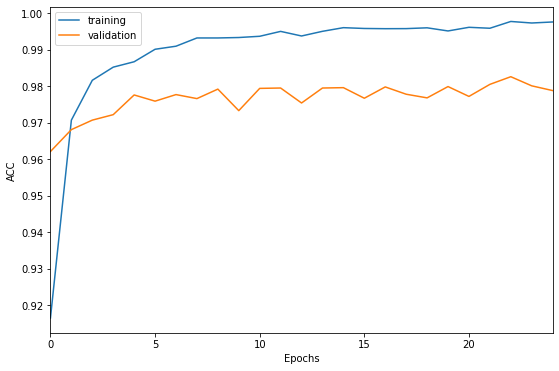

In [5]:
model = tf.keras.models.Sequential([ 

# 이 부분에 미션 코드를 작성하세요!  
Flatten(),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=256, epochs=25, validation_data=(x_val, y_val), verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)

plot_history([history])

# MISSION #2 : Early stopping 구현하기

tf.keras.callbacks.EarlyStopping 기능을 활용하면

매 epoch마다 지정한 metric을 기준으로 early stopping을 수행할 수 있습니다.

* 위 MISSION에서 작성한 모델을 복사해오기, 50 epoch동안 학습

* 매 epoch마다 validation accuracy를 체크해서, 최고기록을 갱신하지 못하는 경우가 3번 연속 지속된다면 학습을 거기서 중단하도록 하자!



힌트 : Early stopping 콜백 기능에서, patience 옵션을 통해 조절할 수 있습니다.

* 한번이라도 정확도가 감소하면 바로 stop하고 싶다 --> patience=1
* 두번은 봐주자! 연속 두번 감소하면 그때 학습을 stop하자 --> patience=2
* ...

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 0.5278 - accuracy: 0.8299 - val_loss: 0.1331 - val_accuracy: 0.9584
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 0.0936 - accuracy: 0.9720 - val_loss: 0.1131 - val_accuracy: 0.9657
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 0.0708 - accuracy: 0.9789 - val_loss: 0.1111 - val_accuracy: 0.9698
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 0.0573 - accuracy: 0.9826 - val_loss: 0.1053 - val_accuracy: 0.9716
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0892 - val_accuracy: 0.9768
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.1039 - val_accuracy: 0.9762
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.0950 - val_accuracy: 0.9795

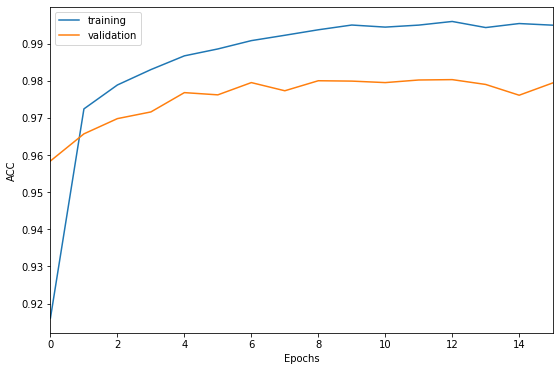

In [6]:
model = tf.keras.models.Sequential([

# MISSION#1에서 작성했던 기준 모델을 복사해와서 활용하세요!  
Flatten(),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)  # 빈칸을 채워봅시다!

history = model.fit(x_train, y_train, batch_size=256, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stop], verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)
plot_history([history])

50 epoch을 수행도록 설정했지만 전부 수행되지 않고, 도중에 early stopping조건을 만족하여 학습이 중단되는 것을 확인하실 수 있습니다.

# MISSION #3 : Capacity 조정 및 Dropout 구현하기

* MISSION #1에서 작성한 기준 모델을 복사해와서,
* flatten layer와, hidden dense layer 2층, output dense layer만 남기기
* Dropout layer 활용, 레이어 사이마다 50% dropout 적용하기

(힌트 : Dropout 기능도 마치 레이어처럼 추가할 수 있습니다. 옵션으로는 dropout할 비율을 0~1사이의 실수값으로 설정하면 됩니다)

In [ ]:
# 필요한 기능을 import하기위한 코드입니다. 실행해주세요~
from tensorflow.keras.layers import Dropout

Epoch 1/25
196/196 [==============================] - 2s 7ms/step - loss: 0.8757 - accuracy: 0.7093 - val_loss: 0.1724 - val_accuracy: 0.9513
Epoch 2/25
196/196 [==============================] - 1s 7ms/step - loss: 0.3271 - accuracy: 0.8947 - val_loss: 0.1282 - val_accuracy: 0.9627
Epoch 3/25
196/196 [==============================] - 1s 6ms/step - loss: 0.2544 - accuracy: 0.9186 - val_loss: 0.1201 - val_accuracy: 0.9640
Epoch 4/25
196/196 [==============================] - 1s 6ms/step - loss: 0.2216 - accuracy: 0.9303 - val_loss: 0.0961 - val_accuracy: 0.9720
Epoch 5/25
196/196 [==============================] - 1s 6ms/step - loss: 0.2012 - accuracy: 0.9367 - val_loss: 0.0928 - val_accuracy: 0.9736
Epoch 6/25
196/196 [==============================] - 1s 6ms/step - loss: 0.1875 - accuracy: 0.9403 - val_loss: 0.0867 - val_accuracy: 0.9731
Epoch 7/25
196/196 [==============================] - 1s 7ms/step - loss: 0.1703 - accuracy: 0.9466 - val_loss: 0.0784 - val_accuracy: 0.9772
Epoch 

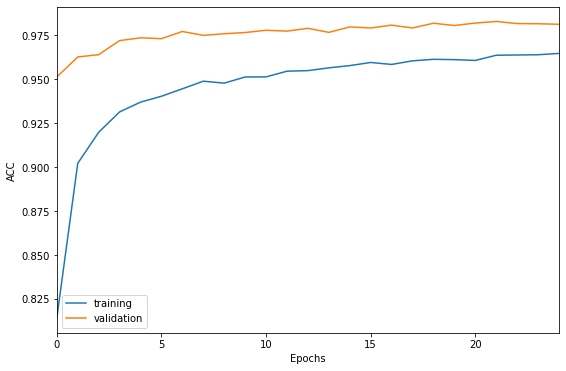

In [7]:
model = tf.keras.models.Sequential([

# MISSION#1에서 작성했던 기준 모델을 복사해와서 활용하세요!  
Flatten(),
Dropout(0.5),
Dense(1024, activation='relu'),
Dropout(0.5),
Dense(1024, activation='relu'), 
Dropout(0.5),
Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

history = model.fit(x_train, y_train, batch_size=256, epochs=25, validation_data=(x_val, y_val), verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)
plot_history([history])